# APS1070
#### Linear Regression - Project 4

Please fill out the following:


*   Your **name**: Vijaykumar Maraviya
*   Your **student number**: 1006040320



##**Marking Scheme:**

This project is worth **10 marks** of your final grade plus **One bonus mark**. 

There is no explicit grading for vectorized coding for this project. The vectorized coding will be tested in Q6. The grade of that question will be given based upon the ranking of your training time. **"Vectorized Coding" => "Faster Execution" => Higher Grade! :)**

This notebook is composed of two sections, a Tutorial, and an Exercise. 

The TAs in the lab will help you to complete your tutorial.


##**Important Note:**



1] Start this lab as early as possible, so that you understand concepts in Tutorial well & get enough time to implement Exercise. 
 
2] Provide a graphical representation of data wherever necessary.  

3] This Project contains 6 questions worth a total of 10 points. Because projects will help
you learn things that are complementary to what we covered in class, they should be completed on
your own. Otherwise, you will not learn from taking this course and you are harming yourself.

## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = wX + b$

This is the equation for a line that you studied in high school. w is the slope of the line and b is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of w and b, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the b term? It is included within the X matrix.


**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:



#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + b(1)$



The bias term can further be incorporated into the quation as an additional weight with cofficient 1

#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + w_0(1)$

- Y is the predicted value ($h_w(x)$)
- w₀ is the bias term.
- w₁,…,wₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:


#$L(y,t)=\frac{1}{2}\ (y-t)^2$

Here t is the actual value and y is the predicted value. 
For the simplest case lets assume a straight line with folowing equation Lets substitute the value of y from $y = wx + b$:

#$J=\frac{1}{2N}[\sum_{i=1}^N((wx^{(i)}+b)-t^{(i)})^2]$

Partial Derivative of the above equation with respect to w is shown here:


#$\frac{{\partial J}}{\partial w}=\frac{1}{2N}[\sum_{i=0}^N2((wx^{(i)}+b
)-t^{(i)})(x^{(i)})]$

#$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

While the Partial Derivative with respect to b is shown here"

#$\frac{\partial J}{\partial b}=\frac{1}{N}[\sum_{i=0}^N(y^{(i)}-t^{(i)})]$

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (w and b), the derivative of cost function with respect to the parameters would be zero.

The solution for the general case comes out to be:

#$w = (X^TX)^{-1}X^Tt$

With $L_2$ Regularization. Cost:

#$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda\sum_{j=1}^nw^2_j]$ 

#$w = (X^TX + \lambda I)^{-1}X^Tt$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters w and b. 

# $w_j=w_j-\alpha*\frac{{\partial J}}{\partial w}$

# $b_j=b_j-\alpha*\frac{{\partial J}}{\partial b}$

Here the term $\alpha$ is defined as the learning rate.

#### Any other solutions methods?

Some other solution methods are QR Decomposition, Singular-Value Decomposition.

- Do these methods give exact solutions?
- Do these methods scale well with large datasets?

## Let's Start

### Analytical Approach in Code

Let's get our hands dirty.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

##### We will start with fitting distribution of data points with a line followed by higher order polynomials to visualize the idea behind it.

In [2]:
n = 5 # number of points
w = 2 # slope of line
b = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x =  r*np.random.rand(n)
print (x)
x.sort()
yPerf = w*x + b # perfect world: no noise
y = w*x + b + np.random.randn(n) # imperfect world: we get noisy data

[0.8719898  0.05185246 1.09932496 0.87064479 0.8407356 ]


Spoiler Alert: We are in an Imperfect World.

In [3]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

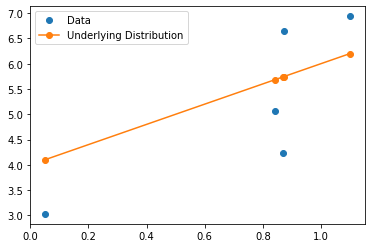

In [4]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [5]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [6]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, W)

In [7]:
W[0],W[1]

(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

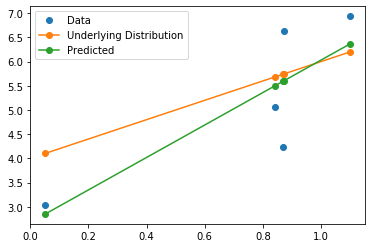

In [8]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [9]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360431


### Complex Dependant Variable

It's complicated.

In [10]:
n = 20 # number of points
w = 3  # slope of line
b = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

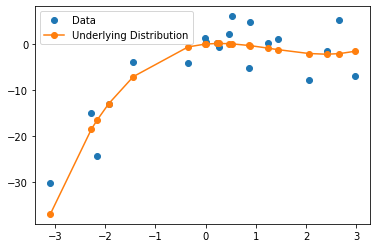

In [11]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [12]:
X = np.vstack((np.ones(np.shape(X)), X)).T
y = y.reshape(-1, 1)

In [13]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, W)

W

array([[-5.45917353],
       [ 3.82202654]])

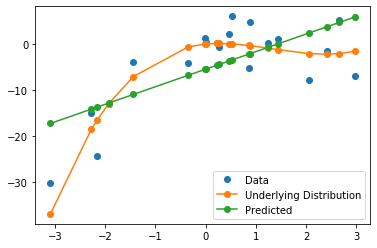

In [14]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [15]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681815


#### What to do next?

Can we add more features.

In [16]:
X = np.vstack((X.T, xD**2, xD**3)).T

In [17]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, W)
W

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

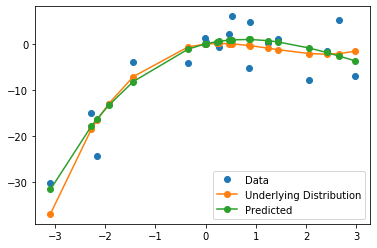

In [18]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [19]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [20]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [21]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, W)


In [22]:
W

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

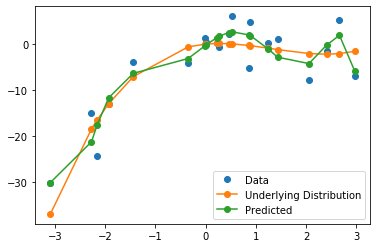

In [23]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [24]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929707


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [25]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [26]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, W)
W


array([[ 0.21326186],
       [ 0.40727946],
       [-0.46745243],
       [-0.31891582],
       [-0.51080301],
       [ 0.38864889],
       [ 0.03613141],
       [-0.03367748]])

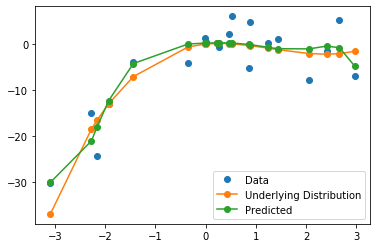

In [27]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 

What does low test error represent?

All models together:

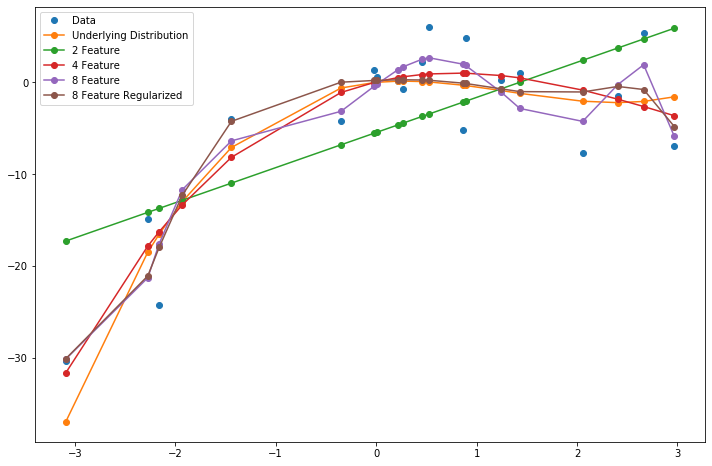

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. Three additional feature were added to this dataset using feature engineering.The objective is to predict the value of prices of the house using the given features. You can download the data by running the cell below.


In [29]:
df=pd.read_csv("https://raw.githubusercontent.com/Saket-Uoft/Data/master/data.csv")

In [30]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,New,New1,New2,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,20.31,0.0,13231.610,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,7.07,0.0,12038.120,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,7.07,0.0,7797.856,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.18,0.0,2790.959,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2.18,0.0,4615.700,36.2


We can see that the target value is given by name by the name MEDV 

Are there any null values in the dataset?

In [31]:
df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
New           0
New1          0
New2          0
MEDV          0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

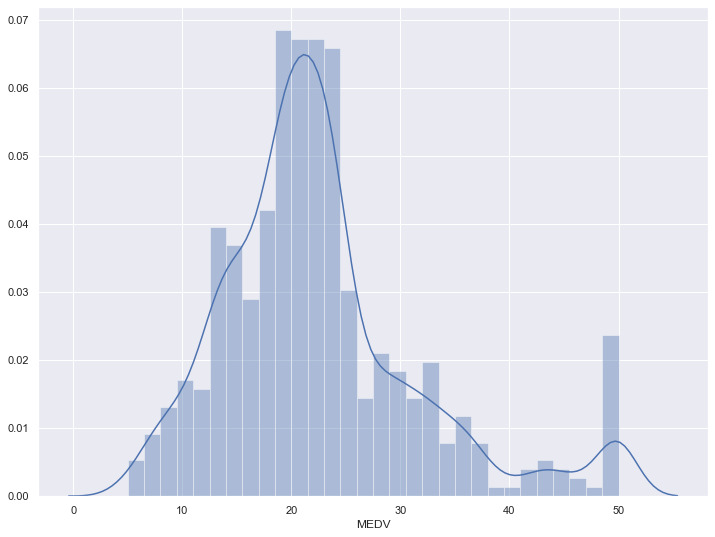

In [32]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [33]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,New,New1,New2,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.500415,0.450960,23857.797958,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,20.498194,1.671481,21429.599726,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,1.890000,0.000000,-6218.299000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,9.742500,0.000000,5690.916250,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,18.100000,0.000000,17915.940000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,23.970000,0.000000,39711.176500,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,101.320000,8.780000,66557.590000,50.000000


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Exercise

We'll work with the above dataset for the assignment below.

## Question 1 - Data Prepration [1 mark]

1. Normalize the data using StandardScaler from sklearn.
2. Split the multivariate data into training/validation data- 20% validation data, 80% training data (Note: While splitting use the value of random state=6)
3. Standardize the data.

ANS :

__I have split the data into train (80%) and test set(20%) with random state value 6. The standard scaler is fitted to training data, then it is used to transform both the train and test datasets. Lastly, the column of 1's is added in the test and train data to account for feature values for bias term.__  

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

#fit the standard scaler on train data and transform train and test data
scaler= StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

X_train.insert(loc = 0, column = 'X0', value = 1)
X_test.insert(loc = 0, column = 'X0', value = 1)

## Question 2 - Direct Solution [1 marks]

Impelement the direct solution for linear regression on the dataset above and find best lambda.

1. Plot Train error and Validation error as a function of the lambda regularizer.

2. What is the best lambda where the best fit occurs? Use this best lambda from here on out.

ANS:

__First, the helper function to find errors, grdiants, and costs are implemeted. The direct solution is implemented.Then, the vectorized function is created to find the best lamda from a list of lambdas. The lamda which makes the test error minimum is selected as the best lambda. (It is good practice to devide the train set in K-folds and use K-fold cross validation to find the best lamda. The test set should be used to measure the generalization performance of a model. However, for simplicity of implementation, the test set is used to find the best lambda).__   

In [36]:
# find the predicted value
def hypothesis(X, W): 
    return np.dot(X, W) 

# Find the residual (difference between predicted value and true value)
def residuals(X, y, W):
    h = hypothesis(X, W)
    return h - y
  
# function to compute gradient of cost function w.r.t. W
def gradient(X, residual, W, λ): 
    m = residual.shape[0]
    grad = (np.dot(X.T, residual) + λ*W)/m
    return grad 

# function to compute the cost 
def costReg(residual, W, λ):
    m = residual.shape[0] 
    J = 0
    J = (np.dot(residual.T, residual) + λ*(np.sum(np.square(W))))/2*m
    return(np.asscalar(J))
    
# function to compute the error for current values of W 
def rmse_(residual):
    m = residual.shape[0]
    J = np.sqrt(np.dot(residual.T, residual)/m)
    return np.asscalar(J)

In [37]:
#direct solution
def directSolReg(X_train, y_train, X_test, y_test, λ):
    
    f=17 
    # analytical solution
    W = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (λ)*np.identity(f)), np.dot(X_train.T, y_train))

    # prediction
    train_res = residuals(X_train, y_train, W)
    train_error = rmse_(train_res)
    J_train = costReg(train_res, W, λ ) 

    test_res = residuals(X_test, y_test, W)
    test_error = rmse_(test_res)
    J_test = costReg(test_res, W, λ)
    
    return W, train_error, test_error, J_train, J_test

In [38]:
# vectorize the direct solution to search the best lamda
dsol = np.vectorize(directSolReg, otypes=[object])

# values of lambda to be searched
λ = np.arange(1,51)
dsol.excluded.add(0)
dsol.excluded.add(1)
dsol.excluded.add(2)
dsol.excluded.add(3)

#vectorize solution for all values of lambda
v_dsol = dsol(X_train, y_train, X_test, y_test, λ)
v_dsol = np.stack(v_dsol)

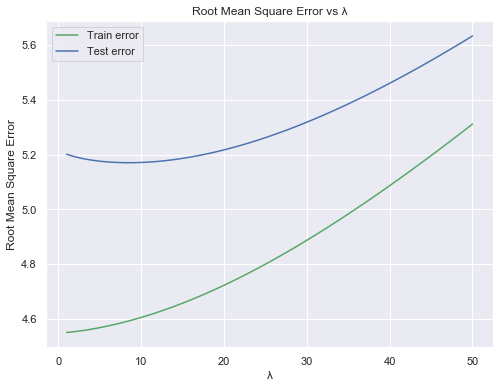

In [39]:
#plot train and test errors for different values of lambda
train_errors = v_dsol[:,1]
test_errors = v_dsol[:,2]

plt.figure(figsize = (8,6))
plt.plot(λ, train_errors, 'g-', label='Train error')
plt.plot(λ, test_errors, 'b-', label='Test error')
plt.ylabel('Root Mean Square Error')
plt.xlabel('λ')
plt.title('Root Mean Square Error vs λ')
plt.legend()
plt.show()

In [40]:
# lambda corrosponding to minimum test error
min_test_error = np.min(test_errors)
print('minimum test error:', min_test_error)
n = np.argmin(test_errors)
print('The best fit occurs at the lambda = ', λ[n])

minimum test error: 5.170866688856863
The best fit occurs at the lambda =  9


In [41]:
# best direct solution with best value of lambda
sol = directSolReg(X_train, y_train, X_test, y_test, 9)
print('best Weights: \n', sol[0])
print('minimum train error:', sol[1])
print('minimum test error:', sol[2])

best Weights: 
 [22.25883777 -0.61912434  0.55447584 -0.52510563  0.42487696 -1.53645362
  2.45106572 -0.08815013 -2.98708997  2.26875853 -2.08351775 -2.06341029
  0.89077533 -3.86942049  0.45768392  0.31186603  0.4610012 ]
minimum train error: 4.596442587142813
minimum test error: 5.170866688856863


## Question 3 - Gradient Descent [2 marks]

1. Implement gradient descent (full-batch) for linear regression using a fixed learning rate $\alpha$ of 1e-2. You should compute the gradients yourself!

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the direct solution with the same lambda.

ANS:

__1. The function to compute the gradiant is implemeted in question 2.__

__2. The GD is run for maximum of 10000 epochs. At the end of 10000 epochs, the test error and train error closely approximate that of direct solution. The two consecutive train error is compared for the condition of convergence. Because of very small learning rate, it doesn't coverge in 10000 epoch. However, if the convergence is defined such that loop terminates when train error is within 1% of minimum train error of direct solution, the convergence is achieved in less than 1000 epochs.__

In [42]:
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

In [43]:
# Vanilla Gradient descent (full-batch) 

def GradientDescent(X_train, y_train, X_test, y_test, alpha, λ):
    w_ = np.zeros((X_train.shape[1], 1))
    m = X_train.shape[0]
    
    #max iteration (epochs)
    n_iterations = 10000
    
    #error with weights intialized to zero
    res_train = residuals(X_train, y_train, w_) 
    res_test = residuals(X_test, y_test, w_)
    train_error = rmse_(res_train)
    test_error = rmse_(res_test)
    
    #list to store errors at each epoch
    train_error_ = [train_error]
    test_error_ = [test_error]

    for itr in range(n_iterations):

        grad = gradient(X_train, res_train, w_, λ)
        w_ -= alpha * grad
        
        res_train = residuals(X_train, y_train, w_) 
        res_test = residuals(X_test, y_test, w_)

        train_error = rmse_(res_train)
        test_error = rmse_(res_test)

        train_error_.append(train_error)
        test_error_.append(test_error)
        
        # terminate the loop if train error coverges 
#         if abs(train_error_[-2] - train_error_[-1]) < 0.0000001 :
#             break
        
        #terminate if train error is within 1% of minimum train error (direct sol)4.64124070
        if  train_error_[-1] < 4.8 :
            break

        
    return w_, train_error_, test_error_, itr + 1

The number of epoch: 380
Test error at convergence: 5.205468708770522


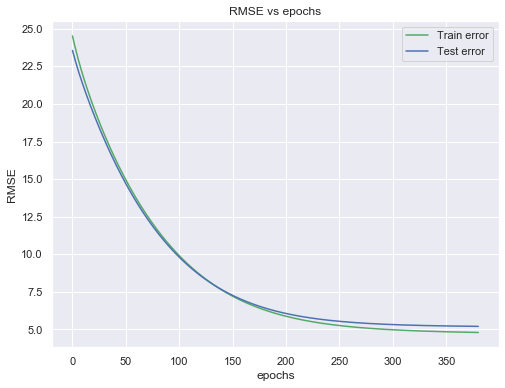

In [44]:
# %matplotlib notebook

a,b,c,d = GradientDescent(X_train, y_train, X_test, y_test, alpha = 1e-2, λ = 9)

print('The number of epoch:', d)
print('Test error at convergence:', c[-1])
plt.figure(figsize = (8,6))
plt.plot(b, 'g-', label='Train error')
plt.plot(c, 'b-', label='Test error')
plt.ylabel('RMSE')
plt.xlabel('epochs')
plt.title('RMSE vs epochs')
plt.legend()
plt.show()


## Question 4 - Mini-batch size and learning rate [2 marks]

1- Impelement Mini-batch Gradient Descent.

ANS:

__1)- The Mini-batch Geadiant Descent (MBGB) is implemented below. The gradiant of cost function obtained using mini-batch is not a true gradiant of the cost function; hence, it introduced local randomness (stochasticity). As a result of this stochasticity, the cost function never really converge. In stead, the value of cost function oscillates near local minima. However, the goal of using mini-batches is to start making weight updates quickly (with partial information of gradiant) to speed up the algorithm.__ 

__To cleary demostrate how quickly MBGD reduces the value of cost function, the loop is terminated when the train error is within 5% of true minimum error obtained in direct solution. This is because the train error will keep oscillating due to randomness after reaching near minima and never really converge.__

__It took around 400 epochs for Vanilla GD to reduce the value of train error to within 5% of true value compared to 250 epochs for MBGD. This reduced run time by factor of nearlly two. This speed up is even more evident when the surface of cost function is flat as in the case of sigmoid function.__

__The MBGD can be made to converge by using decaying learning rate as the value of cost function moves towards minimum. It is implemented in the next question.__

__In sub questions, the same condition for loop termination is used to obeserve the effect of mini-batches.__ 


In [45]:
# linear regression using "mini-batch" gradient descent 

# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches): 
        mini_batch = data[(i * batch_size) :(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini))
    i += 1
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[(i * batch_size):, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches

In [46]:
# function to perform mini-batch gradient descent 
def MBGradientDescent(X_train, y_train, X_test, y_test, alpha, batch_size, max_epochs = 1000): 
    w_ = np.zeros((X_train.shape[1], 1)) 
    λ = 9
    res_train = residuals(X_train, y_train, w_) 
    res_test = residuals(X_test, y_test, w_)
    train_error = rmse_(res_train)
    test_error = rmse_(res_test)
    train_error_ = [train_error]
    test_error_ = [test_error]
    
    for itr in range(max_epochs):
        
        mini_batches = create_mini_batches(X_train, y_train, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            m = X_mini.shape[0]
            res_mini = residuals(X_mini, y_mini, w_)
            w_ -=  alpha * gradient(X_mini, res_mini, w_, λ)
              
        res_train = residuals(X_train, y_train, w_) 
        res_test = residuals(X_test, y_test, w_)
          
        train_error = rmse_(res_train)
        test_error = rmse_(res_test)

        train_error_.append(train_error)
        test_error_.append(test_error)
        
#         #terminate the loop if train error coverges 
#         if abs(train_error_[-2] - train_error_[-1]) < 0.0000001 :
#             break
        
        #terminate if train error is within 5% of minimum train error (direct sol)
        if  train_error_[-1] < 4.80 :
            break
            
    n_epoch = itr + 1
  
    return w_, train_error_, test_error_, n_epoch

The number of epoch before termination: 260
Test error when loop terminates: 5.220887771605149


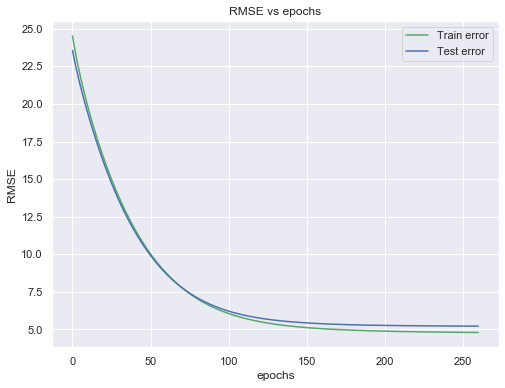

In [47]:
a, b, c, d = MBGradientDescent(X_train, y_train, X_test, y_test, alpha = 0.01, batch_size = 220, max_epochs = 10000)

print('The number of epoch before termination:', d)
print('Test error when loop terminates:', c[-1])

plt.figure(figsize = (8,6))
plt.plot(b, 'g-', label='Train error')
plt.plot(c, 'b-', label='Test error')
plt.ylabel('RMSE')
plt.xlabel('epochs')
plt.title('RMSE vs epochs')
plt.legend()
plt.show()

In [48]:
%%timeit -n100 -r10
a, b, c, d = MBGradientDescent(X_train, y_train, X_test, y_test, alpha = 0.01, batch_size = 220, max_epochs = 10000)

328 ms ± 13.8 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


2- Sweep different values for the batch size with a fixed learning rate and report your findings on a plot (Training Error, Test Error,...).

ANS:

__Fixed learning rate of 0.1 is used to quickly sweep over different values for batch size.__

__In first plot, the train and test error at convergence is plotted against the values of a batch size. some range of batch sizes gives better results compare to others. Here, batch sizes between 210 and 250 gives best results.__

__In second plot, the number of epochs till convergence (if converges) is plotted against the values of batch size . Again some range of batch sizes give better results. Here, batch sizes between 210 and 250 gives best results.__

optimum batch size with respect to test error: 220


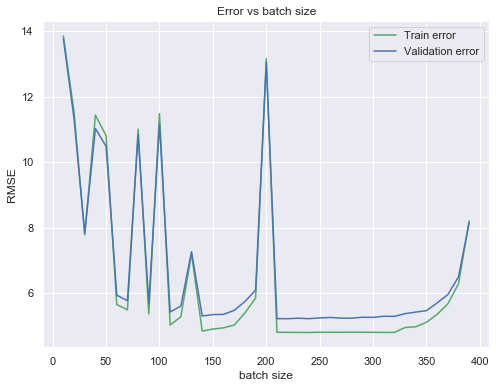

In [87]:
#finding optimum batch size with respect to error

alpha = 0.1
cum_train_error_ = []
cum_test_error_ = []
n_epochs = []

batch_sizes = np.arange(10, 400, 10)
for batch_size in batch_sizes:
    a, b, c, d = MBGradientDescent(X_train, y_train, X_test, y_test, alpha, batch_size, max_epochs = 10000)
    cum_train_error_.append(b[-1])
    cum_test_error_.append(c[-1])
    n_epochs.append(d)

i_ = np.argmin(cum_test_error_)
print('optimum batch size with respect to test error:', batch_sizes[i_])
plt.figure(figsize = (8,6))
plt.plot(batch_sizes, cum_train_error_, 'g-', label='Train error')
plt.plot(batch_sizes, cum_test_error_, 'b-', label='Validation error')
plt.ylabel('RMSE')
plt.xlabel('batch size')
plt.title('Error vs batch size')
plt.legend()
plt.show()

optimum batch size with respect to test error: 210
number of epochs before convergence for the batch size of 210 is: 25


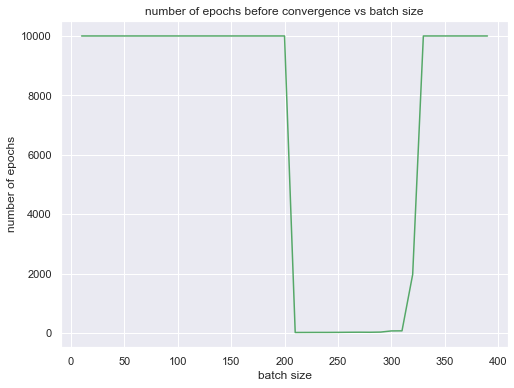

In [89]:
i_ = np.argmin(n_epochs)
print('optimum batch size with respect to test error:', batch_sizes[i_])
print('number of epochs before convergence for the batch size of',batch_sizes[i_], 'is:', n_epochs[i_] )
plt.figure(figsize = (8,6))
plt.plot(batch_sizes, n_epochs, 'g-')
plt.ylabel('number of epochs')
plt.xlabel('batch size')
plt.title('number of epochs before convergence vs batch size')
plt.show()

3- Select the best batch sized based on fastest convergence (number of times you update the weights) and sweep the learning rate. Report your findings on a plot.

ANS:

__The number of weight updates is proportional to the number of epochs before convergence. It can be observed from previous plot that the batch size of 220 gives the fastest convergence.__

__The batch size of 220 is used to sweep the learning rates. The identically distributed values on a log scale between 0.002 and 0.2 are used to find the best learning rate. The max number of epoch is set to 1000. The loop terminates when train error is within 5% of minimum error of direct solution.__ 

__It is observed from the plot that the number of epochs required before convergence decreases as the learning rate increases. However, for very large values of learning rate (values greater than 0.3), the train error diverges to infinity.__


In [59]:
#finding optimum alpha (learning rate) for a batch size of 220
batch_size = 220
cum_train_error_ = []
cum_test_error_ = []

alphas = list(np.logspace(np.log10(0.002), np.log10(0.2), base = 10, num = 20))
alphas = [ round(num, 3)  for num in alphas ] 

for alpha in alphas:
    a, b, c, d = MBGradientDescent(X_train, y_train, X_test, y_test, alpha, batch_size, max_epochs = 1000 )
    cum_train_error_.append(b)
    cum_test_error_.append(c)

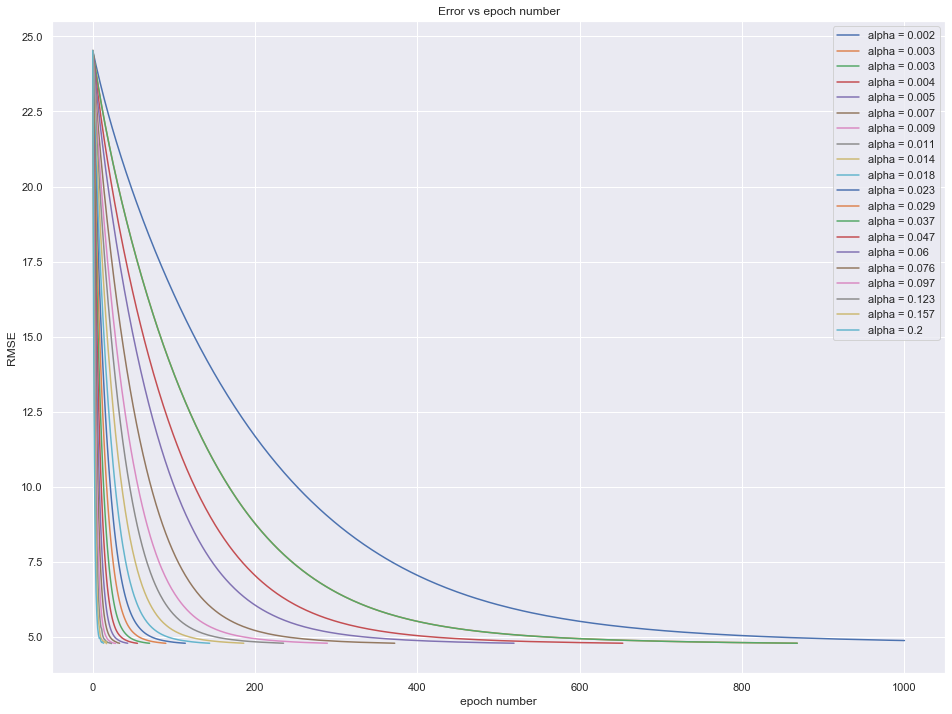

In [60]:
# i = np.argmin(cum_test_error_)
# print('optimum alpha:', alphas[i])

i=0
plt.figure(figsize = (16,12))
for train_errors  in cum_train_error_:
    plt.plot(train_errors, label='alpha = {}'.format(alphas[i]))
    i = i+1
    
plt.ylabel('RMSE')
plt.xlabel('epoch number')
plt.title('Error vs epoch number')
plt.legend()
plt.show()

## Question 5 - Adaptive Learning rate [2 marks]

Impelement an adaptive learning rate scheme where you start a mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima.

ANS:

__As discussed in the previous example, mini-batch gradiant descent speed up the algorithm. However, It fails to truly converge the value of cost function. The value of cost function keeps oscillating around minimum. The adaptive learning rate can be used to make the cost function converge by taking small steps as the value of cost function move towards minimum.__ 

__The adaptive learning rate can be made to decrease based on a function, which reduce the learning rate by some factor after every epoch. This approach introduces new hyper parameter such as a decay rate. In practice, the combinations of hyper parameters (learning rate, batch size, decay rate, etc) are tried and optimum values are obtained through K-Fold cross validation on training data using grid search, random search, bayesian optimization, or similar techniques.__

__The similar function is implemented below. For simplicity, the best approximate values for learning rate and batch size from previous questions are used. The good decay rate is obtained by manually searching over few values.__

__Also, the learning rate can be tweaked manually by observation and adjusted based on number of epochs.__ 

In [85]:
# MBGD with adaptive learning rate

def MBGradientDescentWithALR(X_train, y_train, X_test, y_test, alpha_0, batch_size, max_epochs = 1000): 
    w_ = np.zeros((X_train.shape[1], 1)) 
    λ = 9
    
    res_train = residuals(X_train, y_train, w_) 
    res_test = residuals(X_test, y_test, w_)
    train_error = rmse_(res_train)
    test_error = rmse_(res_test)
    train_error_ = [train_error]
    test_error_ = [test_error]
    
    decay_rate = 0.1
    
    for itr in range(max_epochs):
        
        #learning rate decay
        alpha= (1 / (1 + decay_rate * itr)) * alpha_0
        
        mini_batches = create_mini_batches(X_train, y_train, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            m = X_mini.shape[0]
            res_mini = residuals(X_mini, y_mini, w_)
            w_ -=  alpha * gradient(X_mini, res_mini, w_, λ)
              
        res_train = residuals(X_train, y_train, w_) 
        res_test = residuals(X_test, y_test, w_)
          
        train_error = rmse_(res_train)
        test_error = rmse_(res_test)

        train_error_.append(train_error)
        test_error_.append(test_error)
        
        #terminate if train error converges
        if abs(train_error_[-1] - train_error_[-2]) < 0.0000001:
            break
        
        #terminate if test error is within 1% of minimum test error (direct sol)
        if  test_error_[-1] < 5.2225:
            break
            
    n_epoch = itr + 1
  
    return w_, train_error_, test_error_, n_epoch


test_error at covergence: 5.206296170393156
number of epochs before convergence: 307


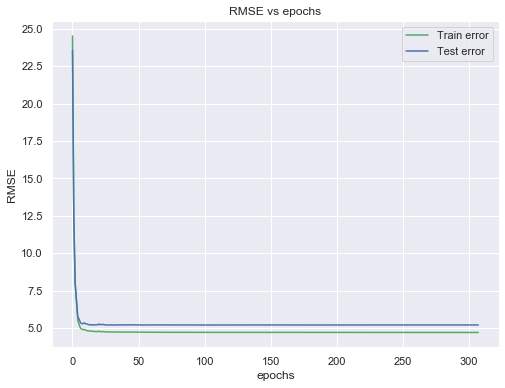

In [62]:
a, b, c, d = MBGradientDescentWithALR(X_train, y_train, X_test, y_test, alpha_0 = 0.3, batch_size = 220, max_epochs = 10000)
print('test_error at covergence:', c[-1])
print('number of epochs before convergence:', d)

plt.figure(figsize = (8,6))
plt.plot(b, 'g-', label='Train error')
plt.plot(c, 'b-', label='Test error')
plt.ylabel('RMSE')
plt.xlabel('epochs')
plt.title('RMSE vs epochs')
plt.legend()
plt.show()

In [86]:
%%timeit -n100 -r10
a, b, c, d = MBGradientDescentWithALR(X_train, y_train, X_test, y_test, alpha_0 = 0.3, batch_size = 220, max_epochs = 10000)

16.3 ms ± 1.12 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


## Question 6 - Fastest Solution! [2 +1 Bonus marks]
Less training time, More marks!

So far, you learned alot about gradient descent. 
Now consider you are an Machine learning expert working for a huge corporation. One of the most important things you will face as an ML expert is to train and develope your models as fast & accurate as possible.

 In this part we want to find a mini-batch size and a learning rate adjustment scheme to train the model quickly. Use the Python time library to measure the training time (time you spend to find the weights). Repeat every case at least 10 times and report the average time (the machine that is running your code is also performing other tasks, averaging time will help you to have a better judgment about the performance of your model). You should train your model until the loss of the model on the test set is close to direct solution with $\pm 1\%$ error. 

 Elaborate your findings with help of tables/plots.

 Report your Best time, and Accuracy!
 
 ANS:
 
 __Condition for convergence: train error converges or test error is close to direct solution with $\pm 1\%$ error.__ 
 
 __for direct solution test error: 5.1708. so the model needs to be trained until test error is less than 5.2225.__
 
 __In order to find the best run time, I have implemented the following algorithms:__
  - Minibatch gradiant descent with momentum and adaptive learning rate
  - Nesterov Accelerated gradiant with adaptive learning rate (NAG)
  - RMSProp
  - ADAM
  - Mini-batch gradient descent with adaptive learning rate (MBGD with ALR)
  
  __Each of the algorithm is run for 10 repetition with 100 loops using IPython cell magic command `%%timeit`. The timings are tabulated below:__
  
__For 1% accuracy__
  
|      | NAG | MBGD with Momentum and ALR | RMSProp | ADAM | MBGD with ALR 
| --- | --- | --- | --- | --- | --- |
| Time | 6.45 ms ± 428 µs | 9.86 ms ± 569 µs | 14.9 ms ± 940 µs | 40.3 ms ± 4.05 ms | 16.3 ms ± 1.12 ms |
  
  
__For this model, NAG performed the best. In general, Adam is considered best choice (especially for nueral networks). However, all of these models requires tuning of hyper-parameters using K-Fold cross validation on a training set. In practice, Grid Search, Random Search, Bayesian Optimization or similar approch is used. These processes are computationally costly (require GPU or CPU with multiple cores).__

__I tried to optimise hyper-parameters based on intuition. With manually optimized parameter, NAG performed the best.__

# Winner: Nesterov Accelerated Gradient

## Time: 6.45 ms



In [63]:
#Nestrov accelearted gradiant with Adaptive Learning Rate

def NAGWithALR(X_train, y_train, X_test, y_test, alpha_0, beta, batch_size, max_epochs = 1000): 
    w_ = np.zeros((X_train.shape[1], 1)) 
    λ = 9

    res_train = residuals(X_train, y_train, w_) 
    res_test = residuals(X_test, y_test, w_)
    train_error = rmse_(res_train)
    test_error = rmse_(res_test)
    train_error_ = [train_error]
    test_error_ = [test_error]
    
    decay_rate = 0.1
    vdW = np.zeros((X_train.shape[1], 1))
    
    for itr in range(max_epochs):
        
        alpha= (1 / (1 + decay_rate * itr)) * alpha_0
        
        mini_batches = create_mini_batches(X_train, y_train, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            m = X_mini.shape[0]
            res_mini = residuals(X_mini, y_mini, w_)
            
            #look ahead weights
            w_la = w_ - beta * vdW
            
            #look ahead gradient
            dW = gradient(X_mini, res_mini, w_la, λ)
            vdW = beta * vdW + alpha * dW
            w_ -=  alpha * vdW
            
        res_train = residuals(X_train, y_train, w_) 
        res_test = residuals(X_test, y_test, w_)

        train_error = rmse_(res_train)
        test_error = rmse_(res_test)

        train_error_.append(train_error)
        test_error_.append(test_error)
        
        #terminate if train error converges
        if abs(train_error_[-1] - train_error_[-2]) < 0.0000001:
            break
        
        #terminate if test error is within 1% of minimum test error (direct sol)
        if  test_error_[-1] < 5.2225:
            break
            
    n_epoch = itr + 1
  
    return w_, train_error_, test_error_, n_epoch

test_error at covergence: 5.222221964881134
number of epochs before convergence: 19


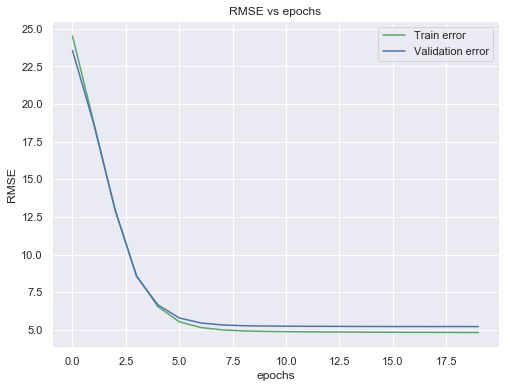

In [64]:
a, b, c, d = NAGWithALR(X_train, y_train, X_test, y_test, alpha_0 = 0.3, beta=0.64, batch_size = 220, max_epochs = 10000)

print('test_error at covergence:', c[-1])
print('number of epochs before convergence:', d)

plt.figure(figsize = (8,6))
plt.plot(b, 'g-', label='Train error')
plt.plot(c, 'b-', label='Validation error')
plt.ylabel('RMSE')
plt.xlabel('epochs')
plt.title('RMSE vs epochs')
plt.legend()
plt.show()

In [66]:
%%timeit -n100 -r10
a, b, c, d = NAGWithALR(X_train, y_train, X_test, y_test, alpha_0 = 0.35, beta=0.64, batch_size = 220, max_epochs = 10000)

6.45 ms ± 428 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


# Extras 
## code for other algorithms:

## GD with Momentum and Adaptive Learning Rate

In [67]:
#Gradiant Descent with Momentum and Adaptive learning rate

def MBGDWithMomentumAndALR(X_train, y_train, X_test, y_test, alpha_0, beta, batch_size, max_epochs = 1000): 
    w_ = np.zeros((X_train.shape[1], 1)) 
    λ = 9

    res_train = residuals(X_train, y_train, w_) 
    res_test = residuals(X_test, y_test, w_)
    train_error = rmse_(res_train)
    test_error = rmse_(res_test)
    train_error_ = [train_error]
    test_error_ = [test_error]
    
    vdW = np.zeros((X_train.shape[1], 1))
    decay_rate = 0.1
    
    for itr in range(max_epochs):
        
        alpha= (1 / (1 + decay_rate * itr)) * alpha_0
        
        mini_batches = create_mini_batches(X_train, y_train, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            m = X_mini.shape[0]
            res_mini = residuals(X_mini, y_mini, w_)
            
            dW = gradient(X_mini, res_mini, w_, λ)
            vdW = beta * vdW + alpha * dW
            
            w_ -=  vdW
              
        res_train = residuals(X_train, y_train, w_) 
        res_test = residuals(X_test, y_test, w_)

        train_error = rmse_(res_train)
        test_error = rmse_(res_test)

        train_error_.append(train_error)
        test_error_.append(test_error)
        
        #terminate if train error converges
        if abs(train_error_[-1] - train_error_[-2]) < 0.0000001:
            break
        
        #terminate if test error is within 1% of minimum test error (direct sol)
        if  test_error_[-1] < 5.2225:
            break
            
    n_epoch = itr + 1
  
    return w_, train_error_, test_error_, n_epoch

test_error at covergence: 5.20500676269475
number of epochs before convergence: 8


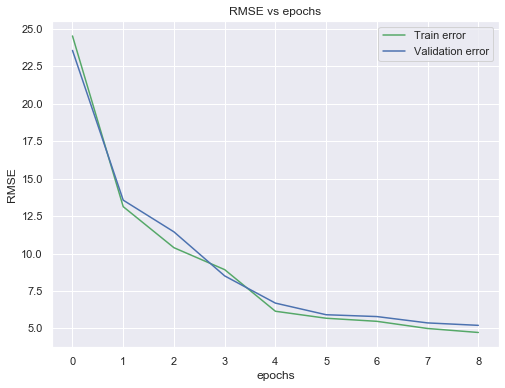

In [69]:
a, b, c, d = MBGDWithMomentumAndALR(X_train, y_train, X_test, y_test, alpha_0 = 0.3, beta=0.64, batch_size = 220, max_epochs = 10000)

print('test_error at covergence:', c[-1])
print('number of epochs before convergence:', d)

plt.figure(figsize = (8,6))
plt.plot(b, 'g-', label='Train error')
plt.plot(c, 'b-', label='Validation error')
plt.ylabel('RMSE')
plt.xlabel('epochs')
plt.title('RMSE vs epochs')
plt.legend()
plt.show()

In [71]:
%%timeit -n100 -r10
a, b, c, d = MBGDWithMomentumAndALR(X_train, y_train, X_test, y_test, alpha_0 = 0.3, beta=0.64, batch_size = 220, max_epochs = 10000)

9.86 ms ± 569 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


## RMSProp

In [72]:
#RMSProp

def RMSProp(X_train, y_train, X_test, y_test, alpha, beta, batch_size, max_epochs = 1000): 
    w_ = np.zeros((X_train.shape[1], 1)) 
    λ = 9
    
    res_train = residuals(X_train, y_train, w_) 
    res_test = residuals(X_test, y_test, w_)
    train_error = rmse_(res_train)
    test_error = rmse_(res_test)
    train_error_ = [train_error]
    test_error_ = [test_error]
    
    sdW = np.zeros((X_train.shape[1], 1))
    epsilon = 1e-8
    
    for itr in range(max_epochs):
        
        mini_batches = create_mini_batches(X_train, y_train, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            m = X_mini.shape[0]
            res_mini = residuals(X_mini, y_mini, w_)
            
            dW = gradient(X_mini, res_mini, w_, λ)
            sdW = beta * sdW + (1 - beta) * (dW**2)
            w_ -=  alpha * (np.divide(dW, np.sqrt(sdW + epsilon)))
              
        res_train = residuals(X_train, y_train, w_) 
        res_test = residuals(X_test, y_test, w_)
                 
        train_error = rmse_(res_train)
        test_error = rmse_(res_test)

        train_error_.append(train_error)
        test_error_.append(test_error)
        
        #terminate if train error converges
        if abs(train_error_[-1] - train_error_[-2]) < 0.0000001:
            break
        
        #terminate if test error is within 1% of minimum test error (direct sol)
        if  test_error_[-1] < 5.2225:
            break
            
    n_epoch = itr + 1
  
    return w_, train_error_, test_error_, n_epoch

test_error at covergence: 5.210208973223484
number of epochs before convergence: 10


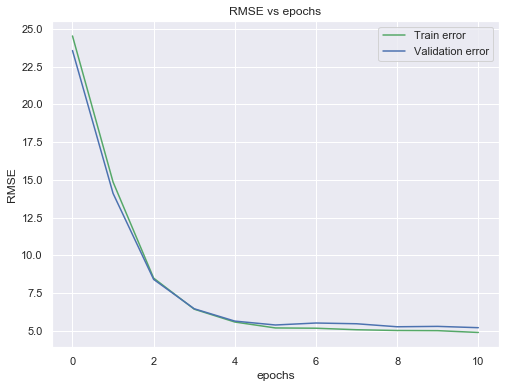

In [74]:
a,b,c,d = RMSProp(X_train, y_train, X_test, y_test, alpha= 0.8, beta = 0.99, batch_size = 220, max_epochs = 1000)

print('test_error at covergence:', c[-1])
print('number of epochs before convergence:', d)

plt.figure(figsize = (8,6))
plt.plot(b, 'g-', label='Train error')
plt.plot(c, 'b-', label='Validation error')
plt.ylabel('RMSE')
plt.xlabel('epochs')
plt.title('RMSE vs epochs')

plt.legend()
plt.show()

In [75]:
%%timeit -n100 -r10
a,b,c,d = RMSProp(X_train, y_train, X_test, y_test, alpha= 0.8, beta = 0.99, batch_size = 220, max_epochs = 1000)

14.9 ms ± 940 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


## ADAM

In [76]:
#ADAM (Adaptive moment)
def ADAM(X_train, y_train, X_test, y_test, alpha, beta1, beta2, batch_size, max_epochs = 1000): 
    w_ = np.zeros((X_train.shape[1], 1)) 
    λ = 9

    res_train = residuals(X_train, y_train, w_) 
    res_test = residuals(X_test, y_test, w_)
    train_error = rmse_(res_train)
    test_error = rmse_(res_test)
    train_error_ = [train_error]
    test_error_ = [test_error]
    
    vdW = np.zeros((X_train.shape[1], 1))
    sdW = np.zeros((X_train.shape[1], 1))
    epsilon = 1e-8
    t=0
    
    for itr in range(max_epochs):
        
        mini_batches = create_mini_batches(X_train, y_train, batch_size) 
        for mini_batch in mini_batches:
            t = t + 1
            X_mini, y_mini = mini_batch
            m = X_mini.shape[0]
            res_mini = residuals(X_mini, y_mini, w_)
            
            dW = gradient(X_mini, res_mini, w_, λ)
            
            vdW = beta1 * vdW + (1 - beta1) * dW
            sdW = beta1 * sdW + (1 - beta2) * (dW**2)
            
            vdW = vdW / (1 - beta1**t)      # fixing bias
            sdW = sdW / (1 - beta2**t)      # fixing bias
            
            w_ -=  alpha * (np.divide(vdW, np.sqrt(sdW + epsilon)))
              
        res_train = residuals(X_train, y_train, w_) 
        res_test = residuals(X_test, y_test, w_)
          
        train_error = rmse_(res_train)
        test_error = rmse_(res_test)

        train_error_.append(train_error)
        test_error_.append(test_error)
        
        #terminate if train error converges
        if abs(train_error_[-1] - train_error_[-2]) < 0.0000001:
            break
        
        #terminate if test error is within 1% of minimum test error (direct sol)
        if  test_error_[-1] < 5.2225:
            break
            
    n_epoch = itr + 1
  
    return w_, train_error_, test_error_, n_epoch

test_error at covergence: 5.21601510368936
number of epochs before convergence: 23


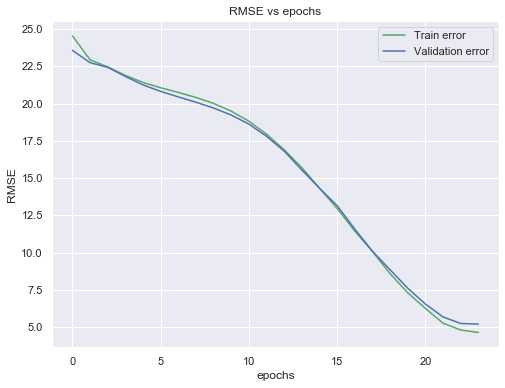

In [82]:
a, b, c, d = ADAM(X_train, y_train, X_test, y_test, alpha = 0.5, beta1 = 0.64, beta2=0.88, batch_size = 220, max_epochs = 1000)
print('test_error at covergence:', c[-1])
print('number of epochs before convergence:', d)

plt.figure(figsize = (8,6))
plt.plot(b, 'g-', label='Train error')
plt.plot(c, 'b-', label='Validation error')
plt.ylabel('RMSE')
plt.xlabel('epochs')
plt.title('RMSE vs epochs')
plt.legend()
plt.show()

In [84]:
%%timeit -n100 -r10
a, b, c, d = ADAM(X_train, y_train, X_test, y_test, alpha = 0.5, beta1 = 0.64, beta2=0.88, batch_size = 220, max_epochs = 1000)

40.3 ms ± 4.05 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


## References

https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Modified: Saket Thavanani